In [75]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec

In [116]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
# lets check for null and nan values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

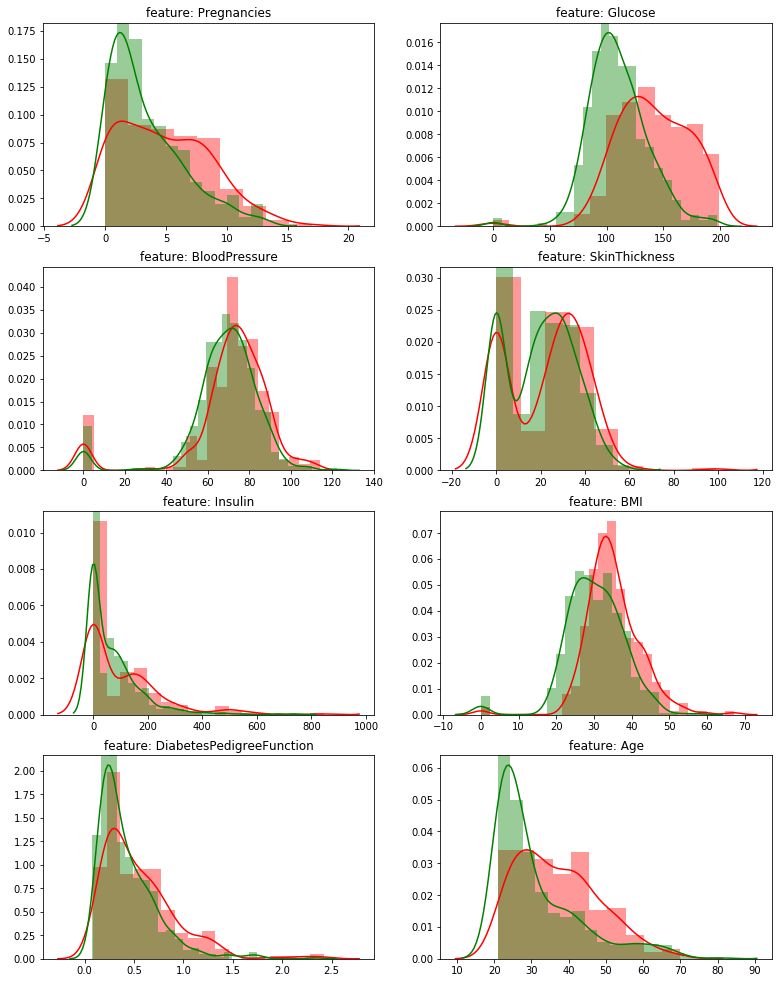

In [163]:
# lets get a sense of the values from a box plot after scaling
df2 = df.copy()
fig, ax = plt.subplots(4,2,figsize=(15,10))
for index,feature in enumerate(df2.columns[:-1]):
    row = index // 2
    col = index % 2
    ax5 = ax[row][col]
#     sns.distplot(df2[feature],ax=ax5)
    sns.distplot(df2[feature][df2.Outcome == 1], color='r',ax=ax5)
    sns.distplot(df2[feature][df2.Outcome == 0], color='g',ax=ax5)
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(feature))
plt.subplots_adjust(bottom=0, right=0.8, top=1.3)
plt.show()


Text(0,0.5,'')

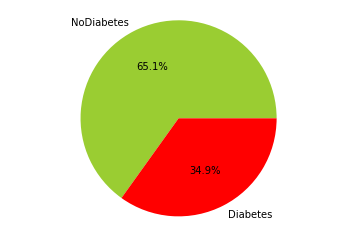

In [164]:
# lots of zero values that dont make sense. Also many of the features are skewed and not very gaussian.
# Check Outcome variable that has 0 value for no diabetes and 1 for diabetes
fig, ax = plt.subplots(1, 1)
ax.pie(df2.Outcome.value_counts(),autopct='%1.1f%%', labels=['NoDiabetes','Diabetes'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

0.6476190476190475

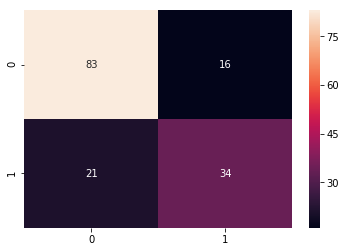

In [96]:
pipeline = Pipeline([('clf', GaussianNB())])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
f1_score(y_test, y_pred)

0.6666666666666665

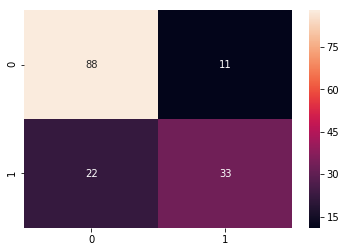

In [98]:
pipeline2 = Pipeline([('scaler', StandardScaler()),('clf', LogisticRegression())])
pipeline2.fit(X_train,y_train)
y2_pred = pipeline2.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y2_pred), annot=True)
f1_score(y_test, y2_pred)

0.6415094339622642

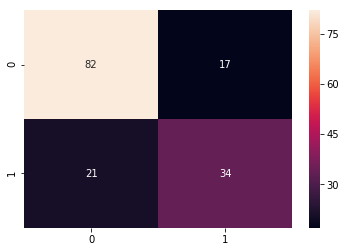

In [115]:
# lets try removing the very skewed looking Insulin and skin depth from the analysis
cols4Test = df.columns[:-1].drop('BloodPressure')
X2_train,X2_test,y2_train,y2_test = train_test_split(df[cols4Test],df['Outcome'],test_size=0.2,shuffle=True,random_state=1)
pipeline = Pipeline([('clf', GaussianNB())])
pipeline.fit(X2_train,y2_train)
y2_pred = pipeline.predict(X2_test)
sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True)
f1_score(y2_test, y2_pred)